In [1]:
from helperTools import *
from latticeElements.utilities import ElementTooShortError
from latticeModels import make_ring_and_injector, RingGeometryError, InjectorGeometryError
from latticeModels_Parameters import optimizerBounds_V1_3,injectorParamsOptimalAny,ringParamsOptimal_V3
from storageRingModeler import StorageRingModel,make_optimal_solution_model
from analyzeSwarmSensitivity_Functions import solve_with_jittered_swarm,make_misalignment_params,get_results_misaligned_dim,plot_trajectories_with_jittered_swarm



model=make_optimal_solution_model()

In [6]:
#jittered results over the space of possible jittering
angle_max=np.pi*2/180
rMax=3e-3
x_max=5e-3
params=make_misalignment_params(x_max,rMax,angle_max,10)
results=[solve_with_jittered_swarm(model,*param) for param in params]
results

[(0.8753571154963088, 39.19264205214881),
 (0.8325743048648304, 52.635917705389716),
 (0.8844930916169271, 36.32192263147259),
 (0.8171508131684565, 57.48230921986557),
 (0.8860248099689224, 35.84062391067628),
 (0.9107202226011865, 28.080796202166965),
 (0.8279753283501501, 54.08101465196899),
 (0.826323100554732, 54.600180021609496),
 (0.8846553702209745, 36.27093121752307),
 (0.8651496731972985, 42.40003910051345)]

In [11]:
#jittering along each axis of the space independently
angle_max=np.pi*2/180
rMax=5e-3
x_max=3e-2
numPointsDim=10
x_arr=np.linspace(-x_max,x_max,numPointsDim)
y_arr=np.linspace(-rMax,rMax,numPointsDim)
z_arr=y_arr.copy()
rot_angle_yArr=np.linspace(-angle_max,angle_max,numPointsDim)
rot_angle_z_arr=rot_angle_yArr.copy()
arrs=(x_arr,y_arr,z_arr,rot_angle_yArr,rot_angle_z_arr)
singleAxisResults=[]
for i,arr in enumerate(arrs):
    def solve(x):
        params=[0]*len(arrs)
        params[i]=x
        return solve_with_jittered_swarm(model,*params)
    singleAxisResults.append(parallel_evaluate(solve,arr))




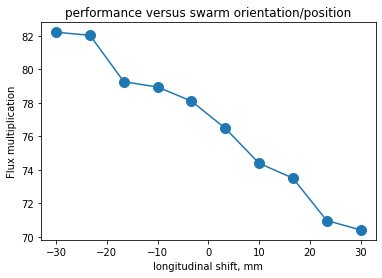

In [22]:
%matplotlib inline
axis=0
xlabels=['longitudinal shift, mm','horizontal shift, mm','vertical shift, mm','rotation about horizontal, deg','rotation about vertical, deg']
title='performance versus swarm orientation/position'
factors=[1e3,1e3,1e3,180/np.pi,180/np.pi]
y=np.array(singleAxisResults[axis])[:,1]
x=arrs[axis]

plt.title(title)
plt.plot(x*factors[axis],y,marker='o',markersize=10)
plt.ylabel("Flux multiplication")
plt.xlabel(xlabels[axis])
plt.show()

In [9]:
from analyzeSwarmSensitivity_Functions import JitteredSwarmModel
%matplotlib tk
with JitteredSwarmModel(model,0,0,0,0,-.1) as model_temp:
    model_temp.show_floor_plan_with_trajectories()